In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import os

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug = "mouse_drug_data.csv"
clinical_trial = "clinicaltrial_data.csv"

In [3]:
# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv(mouse_drug, encoding="ISO-8859-1")
clinical_trial_df = pd.read_csv(clinical_trial, encoding="ISO-8859-1")

In [4]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [5]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
# Display the data table for preview

merge_table = pd.merge(clinical_trial_df,mouse_drug_df, on="Mouse ID", how= 'left')
merge_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [7]:
merge_table.count()

Mouse ID              1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
Drug                  1906
dtype: int64

In [8]:
merge_table.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug                   object
dtype: object

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Group_by_Drug_Timepoint = merge_table.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
#print(Group_by_Drug_Timepoint)
#Group_by_Drug_Timepoint.head()

ave_tumor = Group_by_Drug_Timepoint.mean()

# Convert to DataFrame
ave_tumor = ave_tumor.reset_index()

# Preview DataFrame
ave_tumor.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
ste_tumor = Group_by_Drug_Timepoint.sem()


# Convert to DataFrame
st_error_tumor = pd.DataFrame(ste_tumor)
st_error_tumor = st_error_tumor.reset_index()

# Preview DataFrame
st_error_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
# Minor Data Munging to Re-Format the Data Frames (create pandas pivot table-AVE)

pivot_ave_tumor = ave_tumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_ave_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [12]:
# Minor Data Munging to Re-Format the Data Frames (create pandas pivot table-SEM)

pivot_st_error_tumor = st_error_tumor.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
pivot_st_error_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [13]:
ave_treat_df = pivot_ave_tumor[['Capomulin','Infubinol','Ketapril','Placebo']]
ave_treat_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [14]:
ste_treat_df = pivot_st_error_tumor[['Capomulin','Infubinol','Ketapril','Placebo']]
ste_treat_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


In [15]:
Capomulin_ave = ave_treat_df[['Capomulin']]
Infubinol_ave = ave_treat_df[['Infubinol']]
Ketapril_ave = ave_treat_df[['Ketapril']]
Placebo_ave = ave_treat_df[['Placebo']]

#Capomulin_ave

In [16]:
Capomulin_ste = ste_treat_df[['Capomulin']]
Infubinol_ste = ste_treat_df[['Infubinol']]
Ketapril_ste = ste_treat_df[['Ketapril']]
Placebo_ste = ste_treat_df[['Placebo']]

#Capomulin_ste

In [17]:
time = merge_table.Timepoint.unique()
time

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

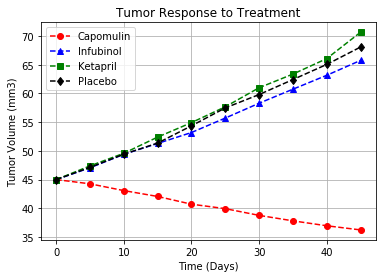

In [18]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

ax.errorbar(time, Capomulin_ave, color="red", label='Capomulin', fmt="o", ls="--")
ax.errorbar(time, Infubinol_ave, color="blue", label='Infubinol', fmt="^", ls="--")
ax.errorbar(time, Ketapril_ave, color="green", label='Ketapril', fmt="s", ls="--")
ax.errorbar(time, Placebo_ave, color="black", label='Placebo', fmt="d", ls="--")

plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

#plt.show()
plt.savefig(os.path.join('figures','tumor_response_to_treatment.png'))


In [19]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

Group_by_Drug_Timepoint_Mets = merge_table.groupby(['Drug','Timepoint'])['Metastatic Sites']

ave_mets = Group_by_Drug_Timepoint_Mets.mean()

# Convert to DataFrame
ave_mets = ave_mets.reset_index()

# Preview DataFrame
ave_mets.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [42]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

ste_mets = Group_by_Drug_Timepoint_Mets.sem()

# Convert to DataFrame
ste_mets_df = pd.DataFrame(ste_mets)


# Preview DataFrame
ste_mets_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [21]:
# Minor Data Munging to Re-Format the Data Frames(AVE)

pivot_ave_mets = ave_mets.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
pivot_ave_mets.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [29]:
# Minor Data Munging to Re-Format the Data Frames(STE)

pivot_ste_mets = ste_mets_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
pivot_ste_mets.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [31]:
Capomulin_ave= pivot_ave_mets[['Capomulin']]
Infubinol_ave = pivot_ave_mets[['Infubinol']]
Ketapril_ave = pivot_ave_mets[['Ketapril']]
Placebo_ave = pivot_ave_mets[['Placebo']]

#Capomulin_ave

In [44]:
Capomulin_ste = pivot_ste_mets[['Capomulin']]
Infubinol_ste = pivot_ste_mets[['Infubinol']]
Ketapril_ste = pivot_ste_mets[['Ketapril']]
Placebo_ste = pivot_ste_mets[['Placebo']]

Capomulin_ste

Drug,Capomulin
Timepoint,
0,0.000000
5,0.074833
10,0.125433
15,0.132048
20,0.161621
25,0.181818
30,0.172944
35,0.169496
40,0.175610


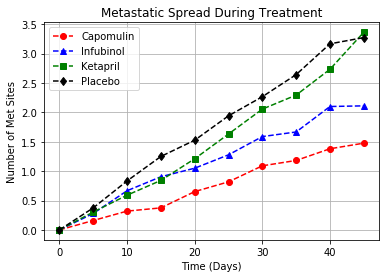

In [61]:
fig, ax = plt.subplots()

ax.errorbar(time, Capomulin_ave, color="red", label='Capomulin', fmt="o", ls="--")
ax.errorbar(time, Infubinol_ave, color="blue", label='Infubinol', fmt="^", ls="--")
ax.errorbar(time, Ketapril_ave, color="green", label='Ketapril', fmt="s", ls="--")
ax.errorbar(time, Placebo_ave, color="black", label='Placebo', fmt="d", ls="--")

plt.legend(loc='best')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Met Sites')
plt.grid()

#plt.show()
plt.savefig(os.path.join('figures','Met_Site_response_to_treatment.png'))

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Group_by_Drug_Timepoint_Mice = merge_table.groupby(['Drug','Timepoint'])['Mouse ID']
Mice_count = Group_by_Drug_Timepoint_Mice.count()

# Convert to DataFrame
Mice_count_df = pd.DataFrame(Mice_count)
Mice_count_df = Mice_count_df.reset_index()

# Preview DataFrame
Mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [50]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mice_count = Mice_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
pivot_mice_count

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [56]:
Capo_count = pivot_mice_count['Capomulin'][0]
Capomulin_per = (pivot_mice_count[['Capomulin']] / Capo_count) * 100

Infubinol_count = pivot_mice_count['Infubinol'][0]
Infubinol_per = (pivot_mice_count[['Infubinol']] / Capo_count) * 100

Ketapril_count = pivot_mice_count['Ketapril'][0]
Ketapril_per = (pivot_mice_count[['Ketapril']] / Capo_count) * 100

Placebo_count = pivot_mice_count['Placebo'][0]
Placebo_per = (pivot_mice_count[['Placebo']] / Capo_count) * 100

#Infubinol_per

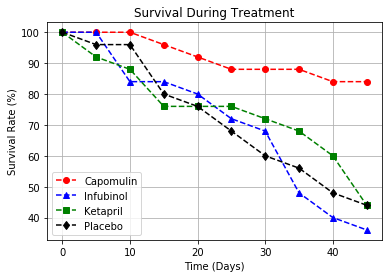

In [60]:
fig, ax = plt.subplots()

ax.errorbar(time, Capomulin_per, color="red", label='Capomulin', fmt="o", ls="--")
ax.errorbar(time, Infubinol_per, color="blue", label='Infubinol', fmt="^", ls="--")
ax.errorbar(time, Ketapril_per, color="green", label='Ketapril', fmt="s", ls="--")
ax.errorbar(time, Placebo_per, color="black", label='Placebo', fmt="d", ls="--")

plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

#plt.show()
plt.savefig(os.path.join('figures','Treatment_Survival_Rates.png'))

In [ ]:
# Calculate the percent changes for tumor size for each drug

# Display the data to confirm

In [66]:
pivot_ave_tumor

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [77]:
percentage_change = (pivot_ave_tumor.iloc[-1]/(pivot_ave_tumor.iloc[0])-1)*100

percentage_change
#Capo_end = pivot_ave_tumor[['Capomulin'][0]]
#Capo_end
#Capomulin_per_chg = (pivot_ave_tumor[['Capomulin'][9]] / pivot_ave_tumor[['Capomulin'][0]]) * 100
#Capomulin_per_chg

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [78]:
# Splice the data between passing and failing drugs
passing = percentage_change < 0



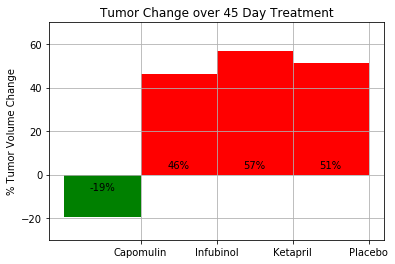

In [86]:
treat_list = ['Capomulin','Infubinol','Ketapril','Placebo']
change_list = [(percentage_change[treat])for treat in treat_list]
tumor_change_bar_graph = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'green',False:'red'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

ax.set_xticklabels(treat_list)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='black',
                ha='center', va='bottom')

autolabel(tumor_change_bar_graph)

plt.savefig(os.path.join('figures','tumor_percent_change_over_45day_treatment.png'))

#plt.show()